# Project desription

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

Kaggle competition URL: https://www.kaggle.com/c/home-credit-default-risk/overview

# Requirements

- Data exploration
- Feature engineering
- At least several different models built and compared to each other on the validation set and on the public and private leaderboards
- Clean code
- At least median private leaderboard score - 0.8

# Evaluation criteria

- Private leaderboard score
- How simple is the model
- How fast is the model prediction
- Code quality

***

# Imports

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option("display.float_format","{:,.2f}".format)
pd.set_option("display.max_columns", None)
import seaborn as sns
sns.set_theme()
from  matplotlib.ticker import FuncFormatter

from functions import distinct_values, missing_values

***

In [3]:
from  matplotlib.ticker import FuncFormatter

# Data description

In [4]:
application_train = pd.read_csv("data/application_train.csv")
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,"202,500.00","406,597.50","24,700.50","351,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,"-3,648.00",-2120,NaN,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,"-1,134.00",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,"270,000.00","1,293,502.50","35,698.50","1,129,500.00",Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,"-1,186.00",-291,NaN,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,NaN,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,0.07,Block,No,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,"67,500.00","135,000.00","6,750.00","135,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,"-4,260.00",-2531,26.00,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.56,0.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,-815.00,0,0

- Static data for all applications. One row represents one loan in our data sample.

In [5]:
print("Number of samples:", len(application_train))

Number of samples: 307511


In [6]:
application_test = pd.read_csv("data/application_test.csv")

***

In [7]:
bureau = pd.read_csv("data/bureau.csv")
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.00,-153.00,NaN,0,"91,323.00",0.00,NaN,0.00,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,"1,075.00",NaN,NaN,0,"225,000.00","171,342.00",NaN,0.00,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.00,NaN,NaN,0,"464,323.50",NaN,NaN,0.00,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,"90,000.00",NaN,NaN,0.00,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,"1,197.00",NaN,"77,674.50",0,"2,700,000.00",NaN,NaN,0.00,Consumer credit,-21,NaN


- All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
- For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

In [8]:
print("Number of samples:", len(bureau))

Number of samples: 1716428


***

In [9]:
bureau_balance = pd.read_csv("data/bureau_balance.csv")
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


- Monthly balances of previous credits in Credit Bureau.
- This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

In [10]:
print("Number of samples:", len(bureau_balance))

Number of samples: 27299925


***

In [11]:
pos_cash_balance = pd.read_csv("data/pos_cash_balance.csv")
pos_cash_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.00,45.00,Active,0,0
1,1715348,367990,-33,36.00,35.00,Active,0,0
2,1784872,397406,-32,12.00,9.00,Active,0,0
3,1903291,269225,-35,48.00,42.00,Active,0,0
4,2341044,334279,-35,36.00,35.00,Active,0,0


- Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
- This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

In [12]:
print("Number of samples:", len(pos_cash_balance))

Number of samples: 10001358


***

In [13]:
credit_card_balance = pd.read_csv("data/credit_card_balance.csv")
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.97,135000,0.00,877.50,0.00,877.50,"1,700.33","1,800.00","1,800.00",0.00,0.00,0.00,0.00,1,0.00,1.00,35.00,Active,0,0
1,2582071,363914,-1,"63,975.56",45000,"2,250.00","2,250.00",0.00,0.00,"2,250.00","2,250.00","2,250.00","60,175.08","64,875.56","64,875.56",1.00,1,0.00,0.00,69.00,Active,0,0
2,1740877,371185,-7,"31,815.22",450000,0.00,0.00,0.00,0.00,"2,250.00","2,250.00","2,250.00","26,926.42","31,460.08","31,460.08",0.00,0,0.00,0.00,30.00,Active,0,0
3,1389973,337855,-4,"236,572.11",225000,"2,250.00","2,250.00",0.00,0.00,"11,795.76","11,925.00","11,925.00","224,949.29","233,048.97","233,048.97",1.00,1,0.00,0.00,10.00,Active,0,0
4,1891521,126868,-1,"453,919.46",450000,0.00,"11,547.00",0.00,"11,547.00","22,924.89","27,000.00","27,000.00","443,044.40","453,919.46","453,919.46",0.00,1,0.00,1.00,101.00,Active,0,0


- Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
- This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

In [14]:
print("Number of samples:", len(credit_card_balance))

Number of samples: 3840312


***

In [15]:
previous_application = pd.read_csv("data/previous_application.csv")
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,"1,730.43","17,145.00","17,145.00",0.00,"17,145.00",SATURDAY,15,Y,1,0.00,0.18,0.87,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00,middle,POS mobile with interest,"365,243.00",-42.00,300.00,-42.00,-37.00,0.00
1,2802425,108129,Cash loans,"25,188.62","607,500.00","679,671.00",NaN,"607,500.00",THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00,low_action,Cash X-Sell: low,"365,243.00",-134.00,916.00,"365,243.00","365,243.00",1.00
2,2523466,122040,Cash loans,"15,060.74","112,500.00","136,444.50",NaN,"112,500.00",TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,high,Cash X-Sell: high,"365,243.00",-271.00,59.00,"365,243.00","365,243.00",1.00
3,2819243,176158,Cash loans,"47,041.33","450,000.00","470,790.00",NaN,"450,000.00",MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,middle,Cash X-Sell: middle,"365,243.00",-482.00,-152.00,-182.00,-177.00,1.00
4,1784265,202054,Cash loans,"31,924.40","337,500.00","404,055.00",NaN,"337,500.00",THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


- All previous applications for Home Credit loans of clients who have loans in our sample.
- There is one row for each previous application related to loans in our data sample.

In [16]:
print("Number of samples:", len(previous_application))

Number of samples: 1670214


***

In [17]:
installments_payments = pd.read_csv("data/installments_payments.csv")
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.00,6,"-1,180.00","-1,187.00","6,948.36","6,948.36"
1,1330831,151639,0.00,34,"-2,156.00","-2,156.00","1,716.53","1,716.53"
2,2085231,193053,2.00,1,-63.00,-63.00,"25,425.00","25,425.00"
3,2452527,199697,1.00,3,"-2,418.00","-2,426.00","24,350.13","24,350.13"
4,2714724,167756,1.00,2,"-1,383.00","-1,366.00","2,165.04","2,160.59"


- Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
- There is a) one row for every payment that was made plus b) one row each for missed payment.
- One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

In [18]:
print("Number of samples:", len(installments_payments))

Number of samples: 13605401


***

# Missing values

Before starting data exploration or feature engineering we must deal with the missing values of our datasets. 67 out of 122 features of initial train dataset has missing values so we must to figure out how to fill them.

In [23]:
print("Features with missing values:", len(missing_values(application_train)))

Features with missing values: 67


## OWN_CAR_AGE column

Let's start from OWN_CAR_AGE column, where the number of NaN is almost equal to number of samples with N value in FLAG_OWN_CAR column. So I have changed NaN value to None if client doesn't have a car. A few empty values left but I'll deal with them later.

In [28]:
missing_values(application_train)[missing_values(application_train)["Feature"] == "OWN_CAR_AGE"]

,Feature,NaN values,"NaN values, %"
21,OWN_CAR_AGE,202929,65.99


In [29]:
print("Clients who doesn't have a car:", len(application_train[application_train["FLAG_OWN_CAR"] == "N"]))

Clients who doesn't have a car: 202924


In [30]:
application_train.loc[application_train["FLAG_OWN_CAR"] == "N", "OWN_CAR_AGE"] = "None"
application_test.loc[application_test["FLAG_OWN_CAR"] == "N", "OWN_CAR_AGE"] = "None"

In [31]:
missing_values(application_train)[missing_values(application_train)["Feature"] == "OWN_CAR_AGE"]

,Feature,NaN values,"NaN values, %"
21,OWN_CAR_AGE,5,0.00


## Building information

Half and more values of information about building where client lives are missing and because it is difficult to predict it from given data, I have decided to drop that columns.

In [36]:
columns_description = pd.read_csv("data/columns_description.csv")
building_info = columns_description[44:91]["Row"].to_list()

missing_values(application_train)[missing_values(application_train)["Feature"].isin(building_info)].head(10)

,Feature,NaN values,"NaN values, %"
62,COMMONAREA_MODE,214865,69.87
48,COMMONAREA_AVG,214865,69.87
76,COMMONAREA_MEDI,214865,69.87
84,NONLIVINGAPARTMENTS_MEDI,213514,69.43
70,NONLIVINGAPARTMENTS_MODE,213514,69.43
56,NONLIVINGAPARTMENTS_AVG,213514,69.43
86,FONDKAPREMONT_MODE,210295,68.39
82,LIVINGAPARTMENTS_MEDI,210199,68.35
54,LIVINGAPARTMENTS_AVG,210199,68.35
68,LIVINGAPARTMENTS_MODE,210199,68.35


In [37]:
application_train = application_train.drop(columns=building_info)
application_test = application_test.drop(columns=building_info)

## External sources

There are three columns with unknown information from external sources. One of them has a little bit more than half of missing values so I'll drop it.

In [38]:
missing_values(application_train)[missing_values(application_train)["Feature"] == "EXT_SOURCE_1"]

,Feature,NaN values,"NaN values, %"
41,EXT_SOURCE_1,173378,56.38


In [39]:
application_train = application_train.drop(columns="EXT_SOURCE_1")
application_test = application_test.drop(columns="EXT_SOURCE_1")

In [40]:
missing_values(application_train)[missing_values(application_train)["Feature"] == "EXT_SOURCE_3"]

,Feature,NaN values,"NaN values, %"
42,EXT_SOURCE_3,60965,19.83


The column EXT_SOURCE_3 has nearly 61 000 missing values and that is almost 20 pct. of all samples. The below frequency graph shows that some values is more frequent than others but it is not possible to distinguish one and fill with it all NaNs. So I have decided to find that most frequent values, whose number in column sums up to half of all samples, and randomly fill missing values with them.

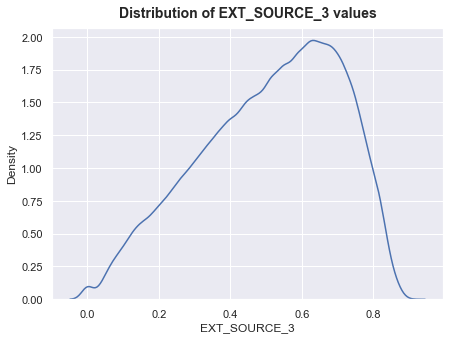

In [41]:
fig, ax = plt.subplots(figsize=(7,5))
sns.kdeplot(ax=ax, data=application_train, x="EXT_SOURCE_3")
plt.title("Distribution of EXT_SOURCE_3 values", fontsize=14, fontweight="bold", pad=10);

In [42]:
application_train = distinct_values(application_train, "EXT_SOURCE_3", 0.5)
application_test = distinct_values(application_test, "EXT_SOURCE_3", 0.5)

## Occupation

Almost one third of values in OCCUPATION_TYPE is missing and because it's hard to guess which and why, I have decided to state that occupation type is unknown and simply to fill NaN with string Unknwon. 

In [43]:
missing_values(application_train)[missing_values(application_train)["Feature"] == "OCCUPATION_TYPE"]

,Feature,NaN values,"NaN values, %"
28,OCCUPATION_TYPE,96391,31.35


In [44]:
application_train["OCCUPATION_TYPE"].fillna("Unknown", inplace=True)
application_test["OCCUPATION_TYPE"].fillna("Unknown", inplace=True)

## Number of enquiries to Credit Bureau

All records that are related to enquiries to Credit Bureau about the client have 41 519 missing values. AMT_REQ_CREDIT_BUREAU_YEAR column as EXT_SOURCE_3 doesn't have one distinguishable value so distinct_values function is suitable here. As for the remaining columns, I can fill NaN with most frequent values because these columns have the clear ones. 

In [46]:
missing_values(application_train)[:6]

,Feature,NaN values,"NaN values, %"
73,AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.50
72,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.50
71,AMT_REQ_CREDIT_BUREAU_MON,41519,13.50
70,AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.50
69,AMT_REQ_CREDIT_BUREAU_DAY,41519,13.50
68,AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.50


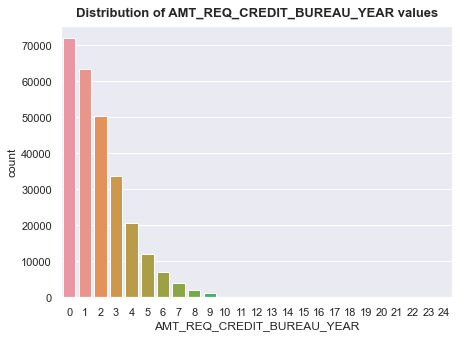

In [47]:
fig, ax = plt.subplots(figsize=(7,5))
sns.countplot(ax=ax, data=application_train, x="AMT_REQ_CREDIT_BUREAU_YEAR")
plt.title("Distribution of AMT_REQ_CREDIT_BUREAU_YEAR values", fontsize=13, fontweight="bold", pad=10)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)));

In [48]:
application_train = distinct_values(application_train, "AMT_REQ_CREDIT_BUREAU_YEAR", 0.5)
application_test = distinct_values(application_test, "AMT_REQ_CREDIT_BUREAU_YEAR", 0.5)

In [49]:
amt_req_list = ["AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_HOUR"]
datasets = [application_train, application_test]

for dataset in datasets:
    for feature in amt_req_list:
        dataset[feature].fillna(dataset[feature].mode().iloc[0], inplace=True)

## Remaining columns

After manually inspecting the remaining columns I have decided to fill missing values with mode, even when it is a continuous feature. The amount of left NaNs is a very small fraction of the whole dataset.  

In [50]:
missing_values(application_train)

,Feature,NaN values,"NaN values, %"
11,NAME_TYPE_SUITE,1292,0.42
43,OBS_30_CNT_SOCIAL_CIRCLE,1021,0.33
44,DEF_30_CNT_SOCIAL_CIRCLE,1021,0.33
45,OBS_60_CNT_SOCIAL_CIRCLE,1021,0.33
46,DEF_60_CNT_SOCIAL_CIRCLE,1021,0.33
41,EXT_SOURCE_2,660,0.21
10,AMT_GOODS_PRICE,278,0.09
9,AMT_ANNUITY,12,0.00
21,OWN_CAR_AGE,5,0.00
29,CNT_FAM_MEMBERS,2,0.00


In [53]:
remaining_features = missing_values(application_train)["Feature"].to_list()
datasets = [application_train, application_test]

for dataset in datasets:
    for feature in remaining_features:
        dataset[feature].fillna(dataset[feature].mode().iloc[0], inplace=True)

In [54]:
missing_values(application_train)

,Feature,NaN values,"NaN values, %"


In [55]:
missing_values(application_test)

,Feature,NaN values,"NaN values, %"


Both main application train and test datasets are without missing values.

# Base model